# Data Analysis Mini Project
- **Name:** Anisa Nur Rahmalina
- **E-mail:** anisa.nur.rahmalina@mail.ugm.ac.id
- **Dicoding ID:** M008B4KX0564

## Deciding Business Question

Deciding a good business question is important to guide the data analyses process. A well defined business question should address a specific problem or insights that can lead to further decision-making action. The data used is Bike Sharing Dataset containing csv files that captures data related to a bike-sharing system, where users rent and return bikes at various locations. This dataset provides detailed information about the bikes' rental patterns, user behavior, and environmental factors over time. It is valuable for understanding how factors such as weather, time of day, or season affect bike rentals and how user types differ in their rental behavior. From this information, the business question can be defined as below:

- When is the peak of bike usage times?
- How does weather (temperature, humidity, wind speed) affect bike rentals?

## Import Libraries

Import the library used to analyse and visualize the data to gather important insights.

In [26]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

## Data Wrangling

### Gathering Data

The data was gathered from kaggle open-source dataset and downloaded to get the csv files. There are two files: day and hour bike rented recap. The day data is choosen to analyzing short-term events or trends and understanding customer behavior patterns throughout the day.

In [6]:
df = pd.read_csv('data/day.csv')

Previewing the data.

In [7]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


From the preview, it appears that the columns' name is difficult to understand. Due to that problem, the columns' name need to be changed to make it easier to understand.

In [8]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

print(df.columns)

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')


- **rec_id**: record index
- **datetime**: date
- **season**: season (1:springer, 2:summer, 3:fall, 4:winter)
- **year**: year (0: 2011, 1:2012)
- **month**: month ( 1 to 12)
- **holiday**: weather day is holiday or not
- **weekday**: day of the week
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
- **weather_condition**: 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **humidity**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **total_count**: count of total rental bikes including both casual and registered

### Assessing Data

In [16]:
df.describe()

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             731 non-null    int64  
 1   datetime           731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  total_count        731 non-null    int64  
dtypes: float64(4), int64(11), 

Checking the number of null element. There's no null element (missing value) in the data thus it doesn't need to implement the filling process. 

In [18]:
num_null = df.isna().sum()
print(num_null)

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64


There's also no duplicated row. That means every row of the data contain unique information.

In [19]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


Count the value of every column so that showed distribution of the class' value in every column.

In [35]:
counter = 1

for col in df.columns:
    if col not in ['rec_id', 'datetime', 'total_count', 'registered', 'casual', 'windspeed', 'humidity', 'atemp', 'temp']:
        print(f"The column '{col}' has:\n", df[col].value_counts(), "\n") 

        counter += 1

The column 'season' has:
 season
3    188
2    184
1    181
4    178
Name: count, dtype: int64 

The column 'year' has:
 year
1    366
0    365
Name: count, dtype: int64 

The column 'month' has:
 month
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64 

The column 'holiday' has:
 holiday
0    710
1     21
Name: count, dtype: int64 

The column 'weekday' has:
 weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64 

The column 'workingday' has:
 workingday
1    500
0    231
Name: count, dtype: int64 

The column 'weather_condition' has:
 weather_condition
1    463
2    247
3     21
Name: count, dtype: int64 



## Exploratory Data Analysis (EDA)

### Explore Data Distribution in Every Columns

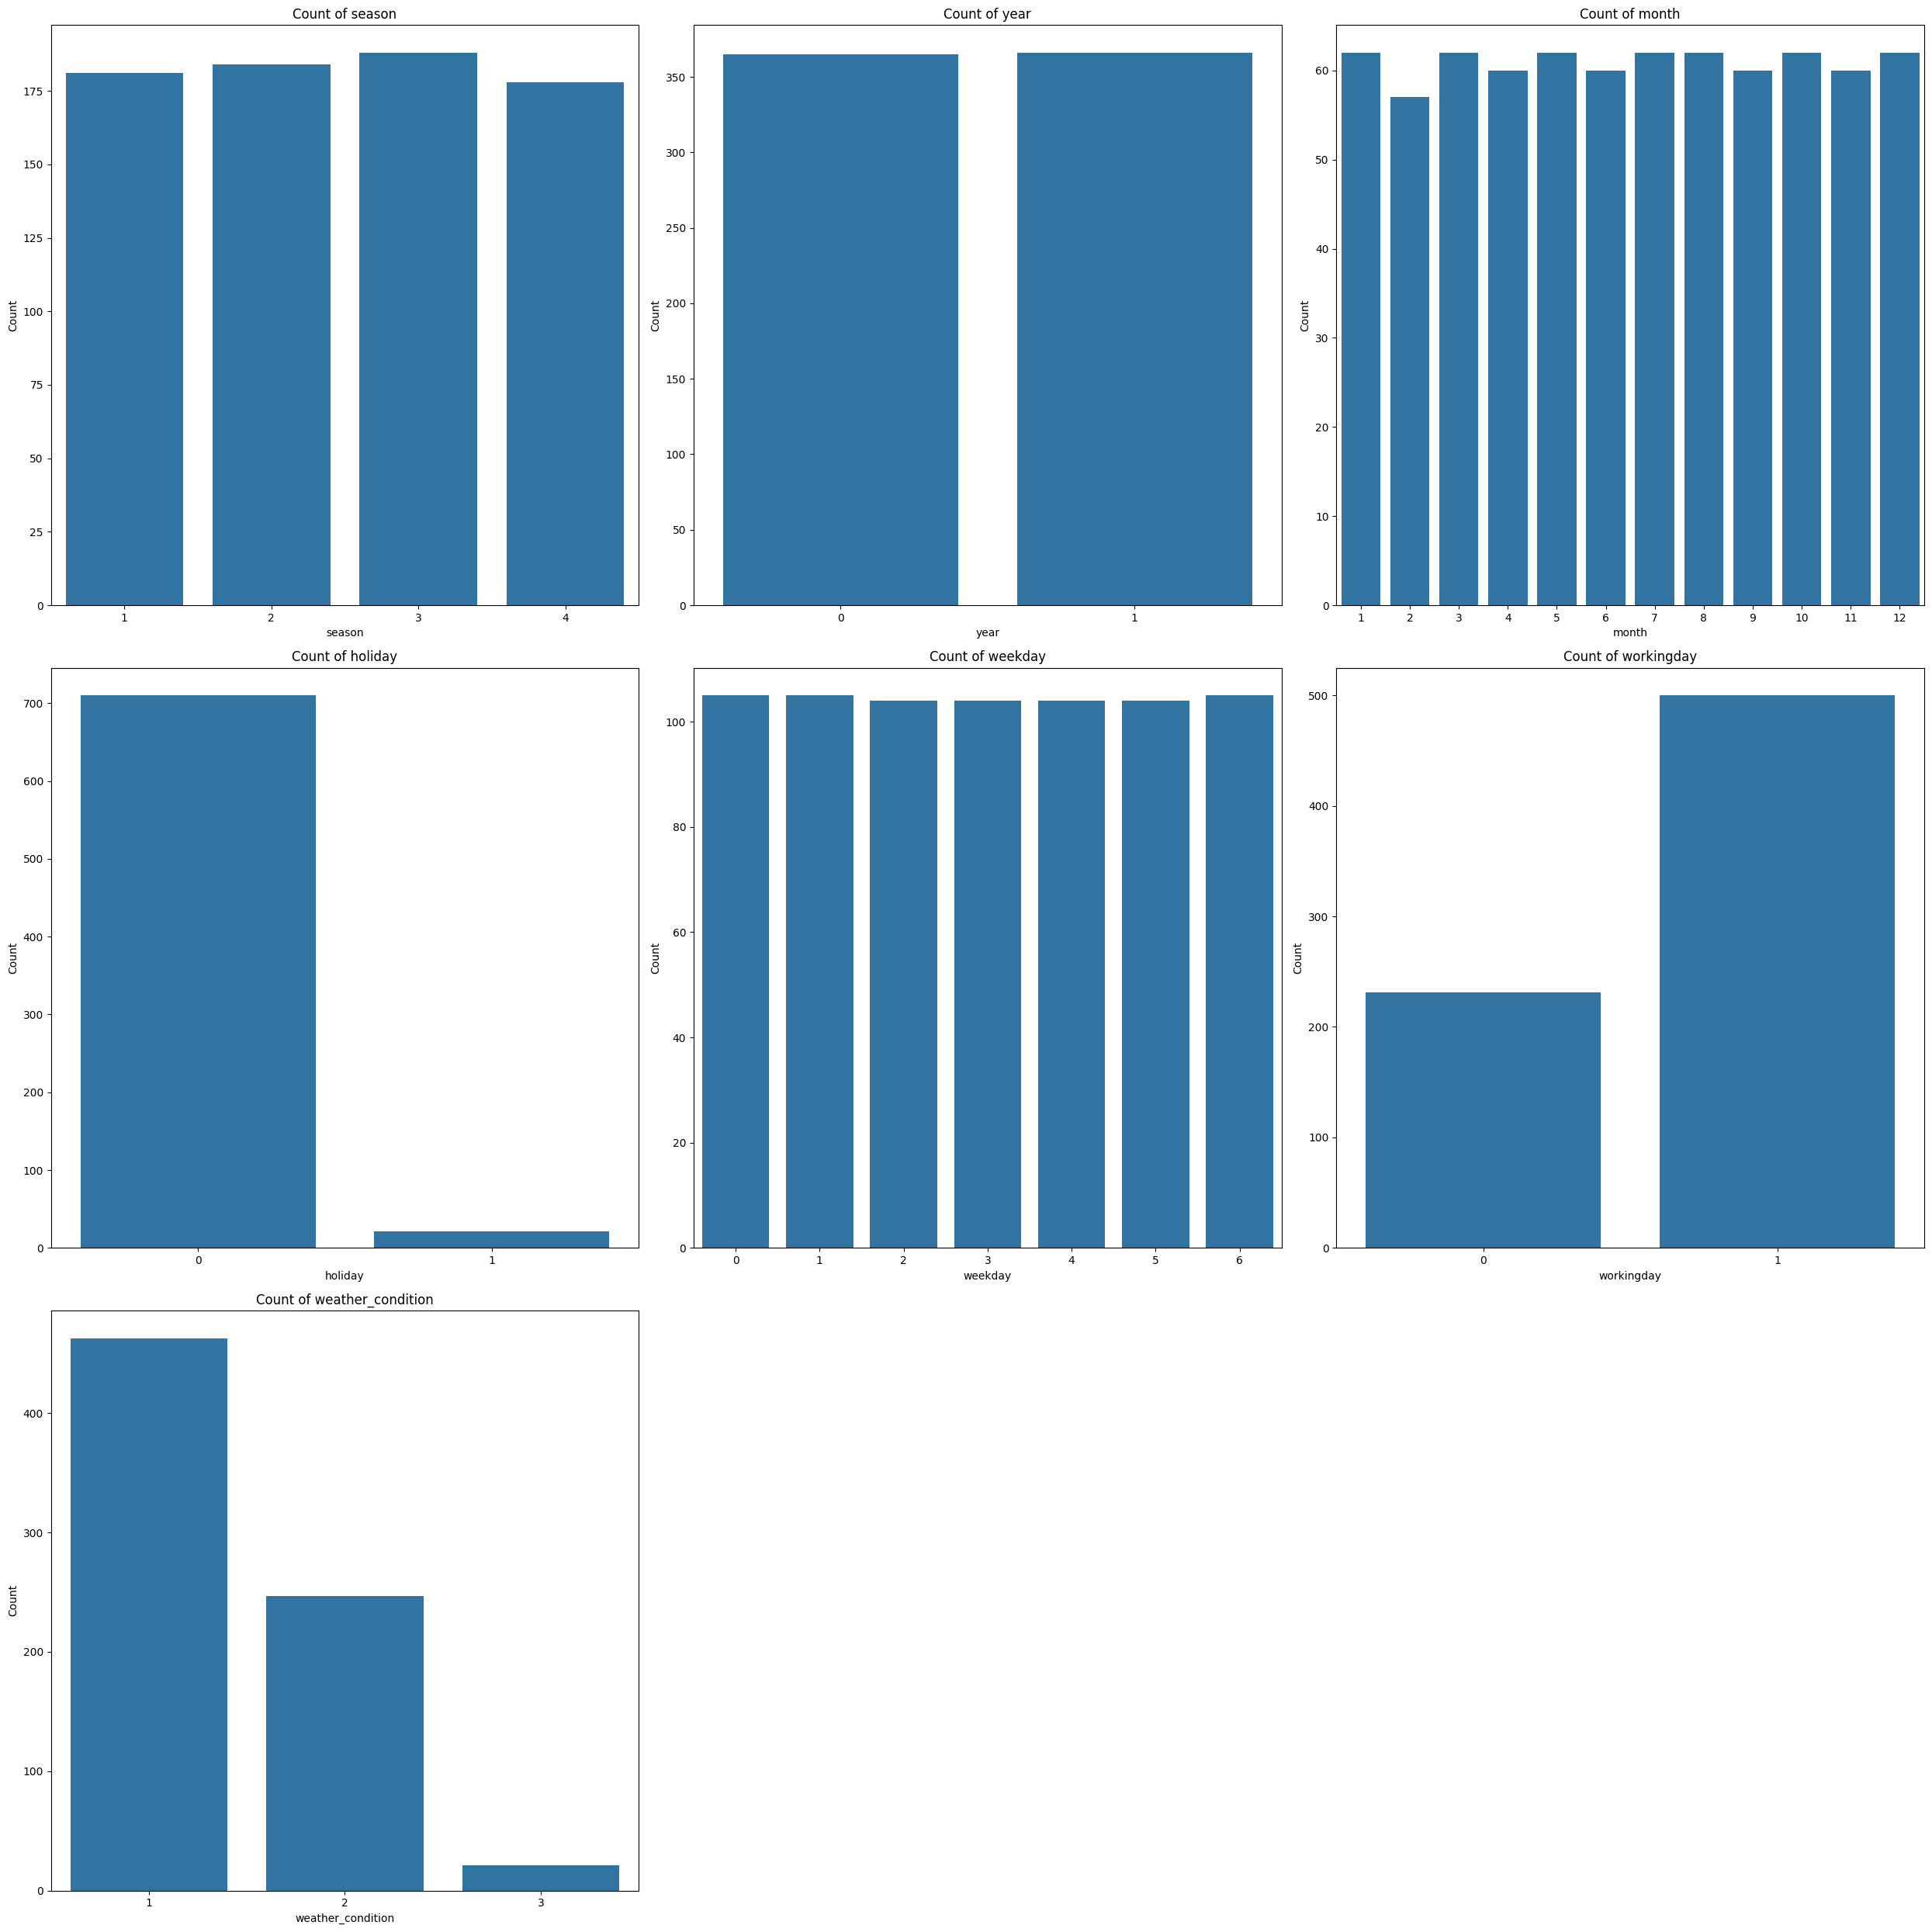

In [34]:
%matplotlib inline
plt.figure(figsize=(25, 25))
counter = 1

for col in df.columns:
    if col not in ['rec_id', 'datetime', 'total_count', 'registered', 'casual', 'windspeed', 'humidity', 'atemp', 'temp']:
        plt.subplot(3, 3, counter)
        sns.countplot(x=col, data=df)
        plt.title(f"Count of {col}")  
        plt.xlabel(col)  
        plt.ylabel("Count")  

        counter += 1

plt.tight_layout()
plt.show()

Exploring the data distribution using bar charts is a great way to visualize categorical data. Here's some insight from the visualization:
- The number of seasons is distributed evenly throughout year and suggests a consistent interest in bike, meaning that there's no significant seasonal bias. 
- This slight difference in counts may affect comparisons between years, especially in analyses that consider seasonal trend.
- The data distribution indicates consistent monthly recording, but in every February shows a reduction. It may be important to analyze bike rental trends by month to identify peak usage periods.
- Bike rent is primarily used for regular commuting rather than specifically for holidays.
- Bike-renting services are more popular on working days than holidays, possibly for commuting purposes.
- Most rentals occur under clear or mild weather conditions and there's a very low count on rainy conditions.
 

## Explore Outliers in Every Columns

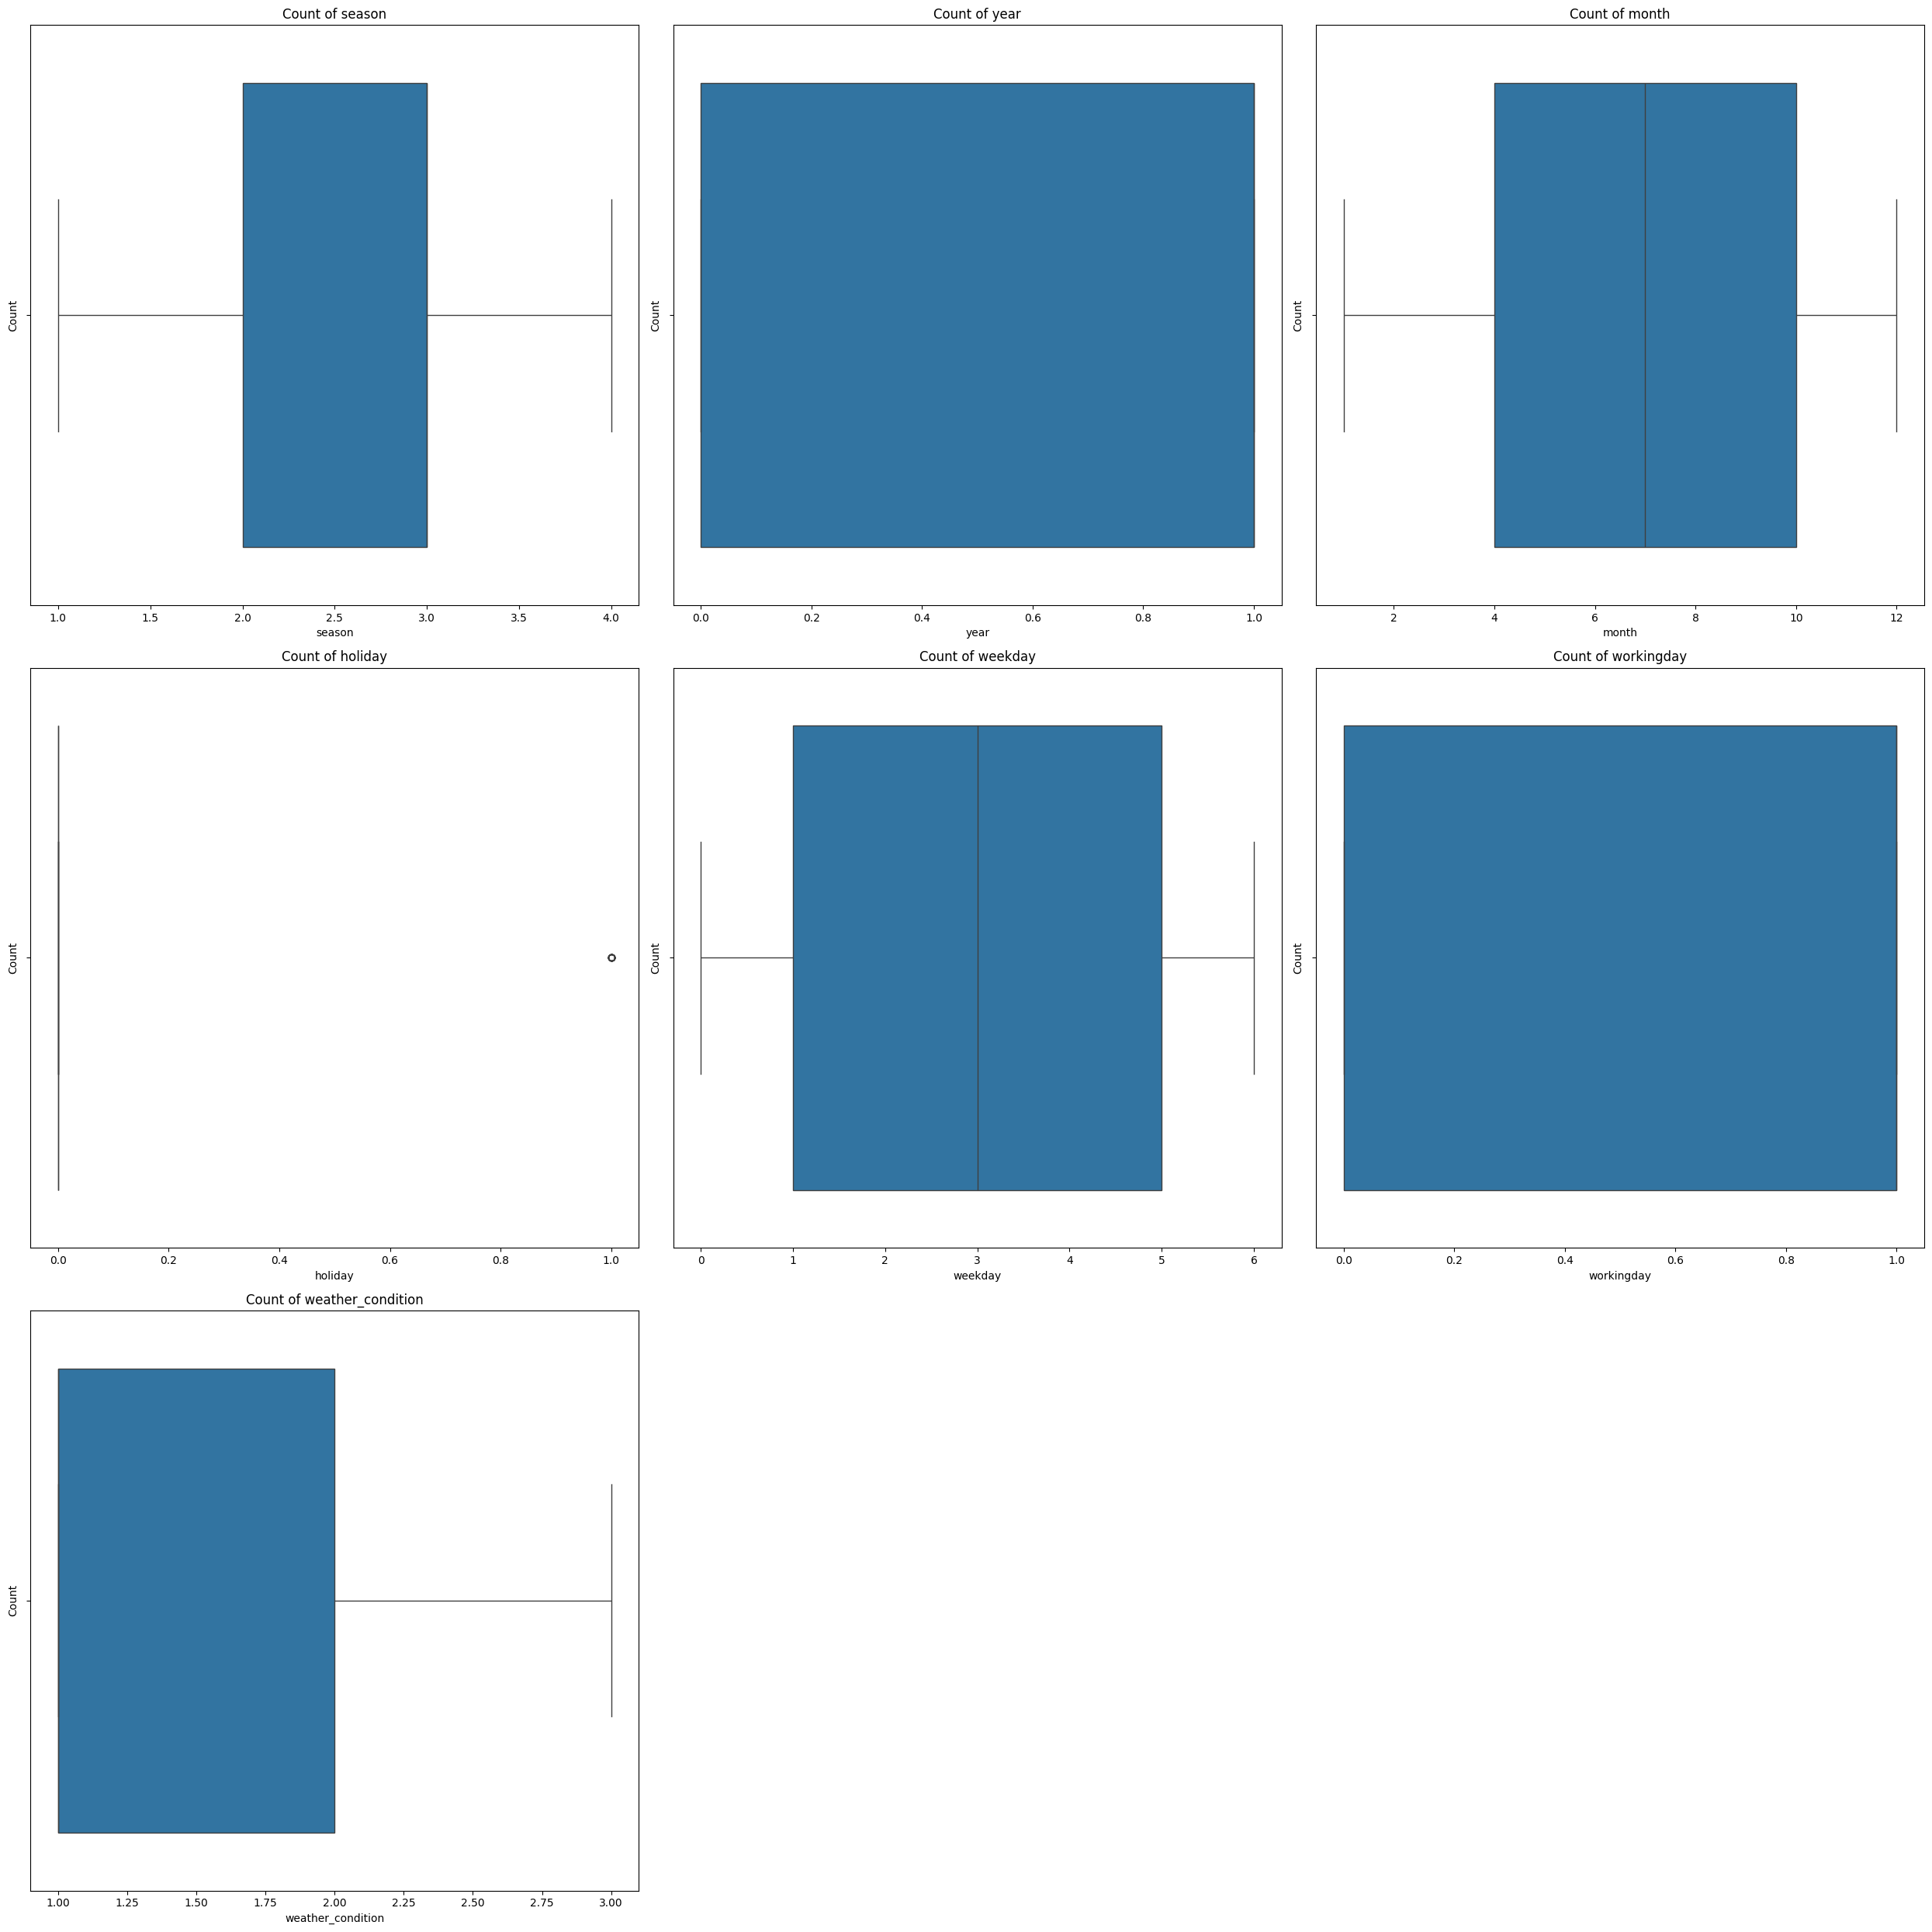

In [14]:
%matplotlib inline
plt.figure(figsize=(25, 25))
counter = 1

for col in df.columns:
    if col not in ['rec_id', 'datetime', 'total_count', 'registered', 'casual', 'windspeed', 'humidity', 'atemp', 'temp']:
        plt.subplot(3, 3, counter)
        sns.boxplot(x=col, data=df)
        plt.title(f"Count of {col}")  
        plt.xlabel(col)  
        plt.ylabel("Count")  

        counter += 1

plt.tight_layout()
plt.show()

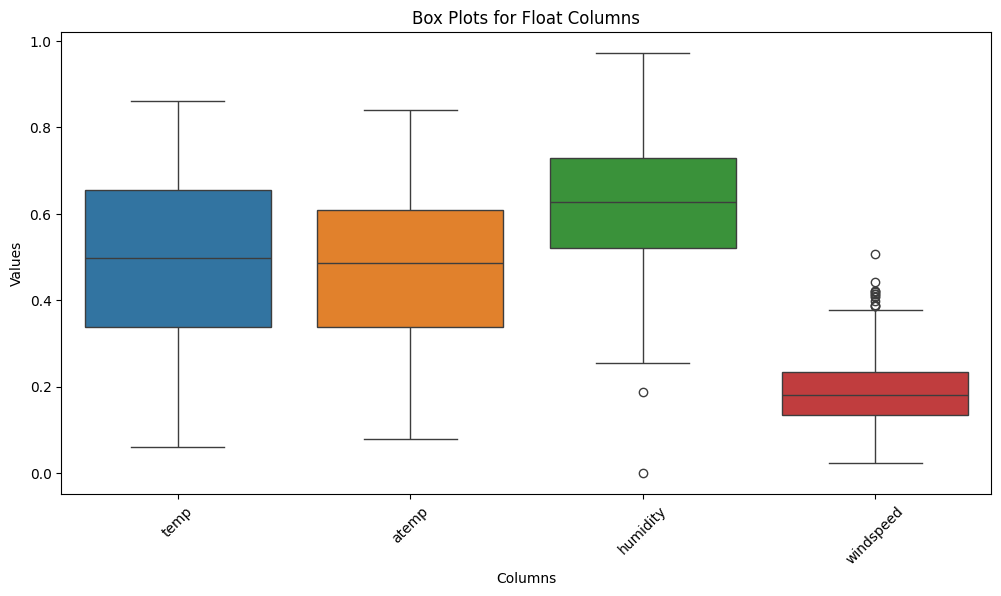

In [15]:
float_columns = df.select_dtypes(include=['float64']).columns.tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[float_columns])
plt.title('Box Plots for Float Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

- Based on the data, there's no significant outliers occur in the columns with integer datatype.
- But, the column 'humidity' and 'windspeed' need an outlier handling.
- The holiday usage pattern could be classified as an outlier due to the significantly lower rentals during holiday periods compared to non-holidays.
- The low counts in adverse weather conditions also suggest that bad weather can create an outlier situation where bike rentals drastically drop.

Outlier handling 

In [16]:
columns_to_check = ['humidity', 'windspeed']
rows_to_keep = df.index

for column in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR

    outlier_indices = df[(df[column] < (Q1 - outlier_step)) | (df[column] > (Q3 + outlier_step))].index
    rows_to_keep = rows_to_keep.difference(outlier_indices)

df_new = df.loc[rows_to_keep].reset_index(drop=True)
print(df_new)

     rec_id    datetime  season  year  month  holiday  weekday  workingday  \
0         1  2011-01-01       1     0      1        0        6           0   
1         2  2011-01-02       1     0      1        0        0           0   
2         3  2011-01-03       1     0      1        0        1           1   
3         4  2011-01-04       1     0      1        0        2           1   
4         5  2011-01-05       1     0      1        0        3           1   
..      ...         ...     ...   ...    ...      ...      ...         ...   
712     727  2012-12-27       1     1     12        0        4           1   
713     728  2012-12-28       1     1     12        0        5           1   
714     729  2012-12-29       1     1     12        0        6           0   
715     730  2012-12-30       1     1     12        0        0           0   
716     731  2012-12-31       1     1     12        0        1           1   

     weather_condition      temp     atemp  humidity  windspeed

In [17]:
df_new.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Explore Correlation Within Every Columns

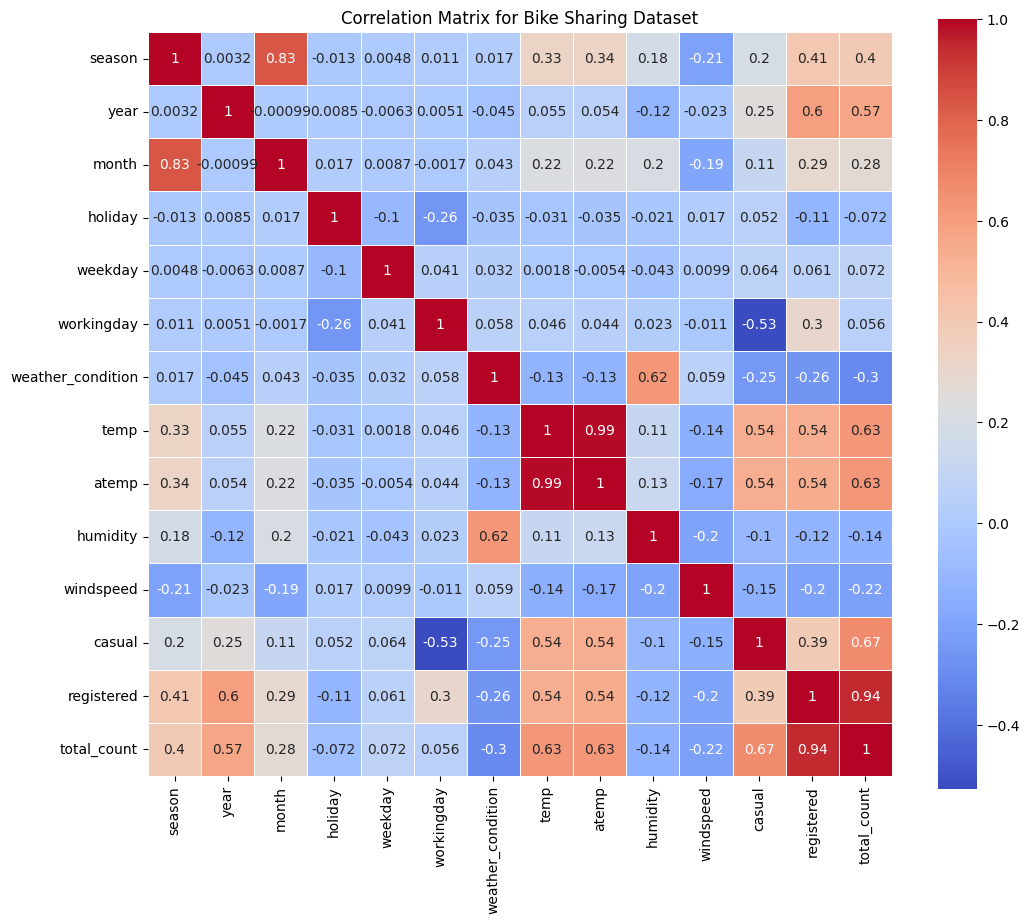

In [18]:
numeric_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 
                   'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 
                   'casual', 'registered', 'total_count']

correlation_matrix = df_new[numeric_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix for Bike Sharing Dataset')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



Heatmap is used to measure the correlation within every columns to total_counts column. This method is applied to show if there's a condition that have a linear relationship with total number of rented bike. 
- The total count of bike rented correlated the most with registered users count, casual user count, and temperature.  
- There's no significant condition within user registration that correlated with the total count of bikes rented, meaning registered or casual users do not significantly affect each other’s impact on the overall rental count.
- The close correlation between the counts of registered and casual users with total rentals suggests that both user types contribute significantly to overall bike rentals.
- The strong positive correlation with temperature indicates that as the temperature rises, the total number of bike rentals increases. This suggests that favorable weather conditions encourage more people to rent bikes.

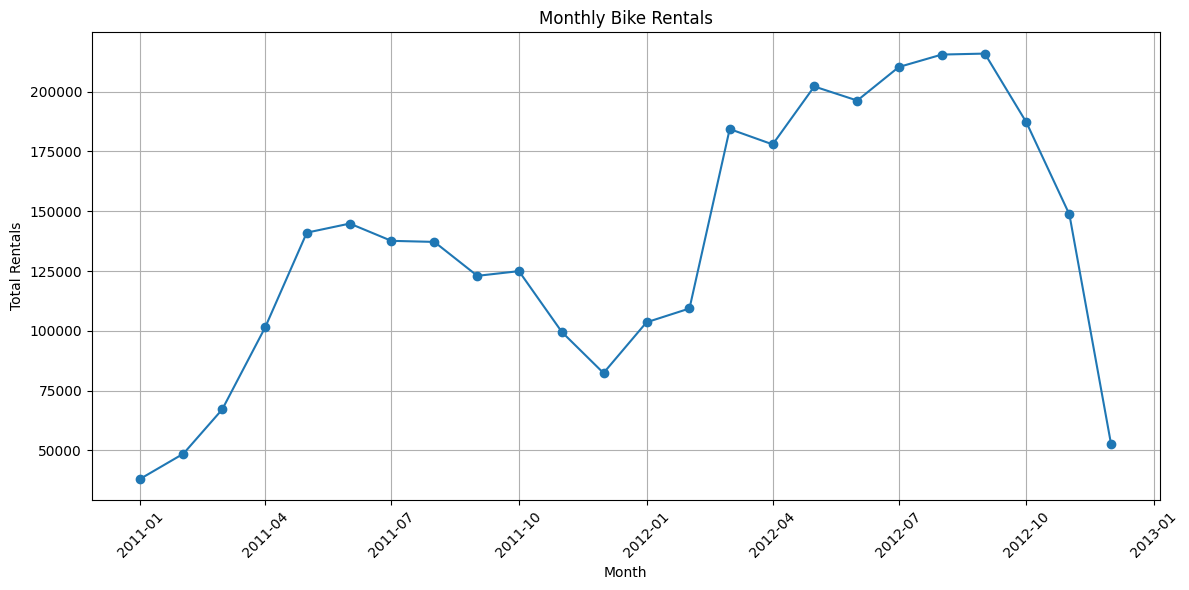

In [27]:
df_new['datetime'] = pd.to_datetime(df['datetime'])

df_new['year_month'] = df_new['datetime'].dt.to_period('M')

monthly_rentals = df_new.groupby('year_month')['total_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_rentals['year_month'].dt.to_timestamp(), monthly_rentals['total_count'], marker='o')
plt.title('Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

The bike rented count fluctuated over time.

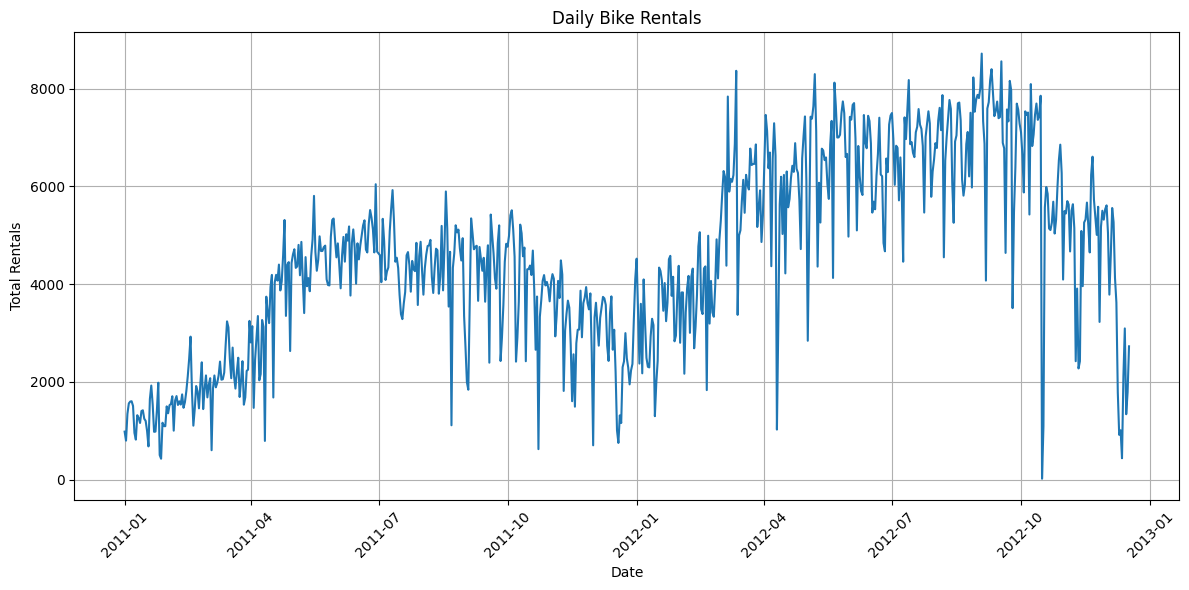

In [35]:
df_new['datetime'] = pd.to_datetime(df_new['datetime'])

# Create a new column for the date (without time)
df_new['date'] = df_new['datetime'].dt.date

# Group by the new date column and sum the total counts
daily_rentals = df_new.groupby('date')['total_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_rentals['date'], daily_rentals['total_count'])
plt.title('Daily Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Further Analysis

## Clustering

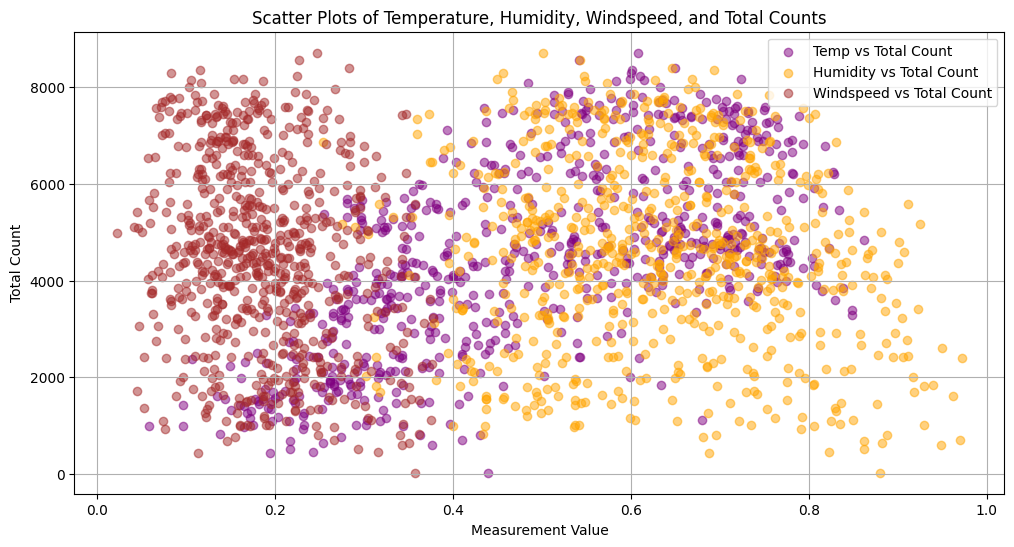

In [32]:

numeric_cols = df_new[['temp', 'humidity', 'windspeed', 'total_count']]

# Normalize the data
normalized_data = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

plt.figure(figsize=(12, 6))
plt.scatter(df_new['temp'], df_new['total_count'], c='purple', label='Temp vs Total Count', alpha=0.5)
plt.scatter(df_new['humidity'], df_new['total_count'], c='orange', label='Humidity vs Total Count', alpha=0.5)
plt.scatter(df_new['windspeed'], df_new['total_count'], c='brown', label='Windspeed vs Total Count', alpha=0.5)

plt.title('Scatter Plots of Temperature, Humidity, Windspeed, and Total Counts')
plt.xlabel('Measurement Value')
plt.ylabel('Total Count')
plt.legend()
plt.grid()
plt.show()

Overall trends:
- There is a tendency for higher temperatures to be associated with higher total counts
- Because the humidity and windspeed have lower correlation with total count of rented bike, total counts seem to show some variability within those two features and seems to be no clear pattern. 

## Visualization & Explanatory Analysis

### When is the peak of bike usage times?

The peak time of bike rented is on the weekday and when the weather is nice, primarily used for regular commuting rather than specifically for holidays. Season doesn't matter much on bike rent usage.

### How does weather (temperature, humidity, wind speed) affect bike rentals?

The weather significantly influences bike rental patterns:
- As shown in the correlation analysis, temperature typically has a positive correlation with bike rentals. Higher temperatures are likely to increase bike usage as people are more inclined to bike when the weather is pleasant.
- Humidity often has a negative correlation with bike rentals. Higher humidity can make biking uncomfortable, discouraging riders. This trend aligns with the fact that many people prefer biking in drier conditions.
- Wind speed can also negatively impact bike rentals. Strong winds can make biking more challenging and less enjoyable, leading to fewer rentals on windy days.

## Conclusion

The analysis reveals that bike rentals peak on weekdays, primarily for commuting rather than holiday. Key insights indicate that weather significantly influences rental patterns that is temperature has a positive correlation with bike rentals, while humidity negatively impacts rentals. Similarly, wind speed also shows a negative correlation, with strong winds making biking less rented. Interestingly, the season appears to have a minimal impact on rental patterns, suggesting that daily weather conditions play a more crucial role in driving bike usage.